In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install pyarrow

In [9]:
all_data = pd.read_feather(r'C:\Users\huynh\Python\Sales_Analysis/Sales_data.ftr')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [11]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [20]:
all_data = all_data.dropna(how='all')

In [21]:
all_data.shape

(185687, 6)

In [22]:
all_data.duplicated().sum()

np.int64(0)

In [23]:
all_data = all_data.drop_duplicates()

# Analysing Monthly Sales
## Which is the best month for sales

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [25]:
all_data['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 185687, dtype: object

In [26]:
all_data['Order Date'][0]

'04/19/19 08:46'

In [28]:
all_data['Order Date'].str.split('/') 

0         [04, 19, 19 08:46]
2         [04, 07, 19 22:30]
3         [04, 12, 19 14:38]
4         [04, 12, 19 14:38]
5         [04, 30, 19 09:27]
                 ...        
186845    [09, 17, 19 20:56]
186846    [09, 01, 19 16:00]
186847    [09, 23, 19 07:39]
186848    [09, 19, 19 17:30]
186849    [09, 30, 19 00:18]
Name: Order Date, Length: 185687, dtype: object

In [35]:
all_data['Month'] = all_data['Order Date'].str.split('/').str[0]

In [36]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [38]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [41]:
filter1 = all_data['Month']== 'Order Date'
all_data[filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [42]:
all_data = all_data[~filter1]

In [44]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
all_data['Month'] = all_data['Month'].astype(int)

In [47]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [49]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int) 
all_data['Price Each'] = all_data['Price Each'].astype(float) 

In [50]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [52]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [53]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


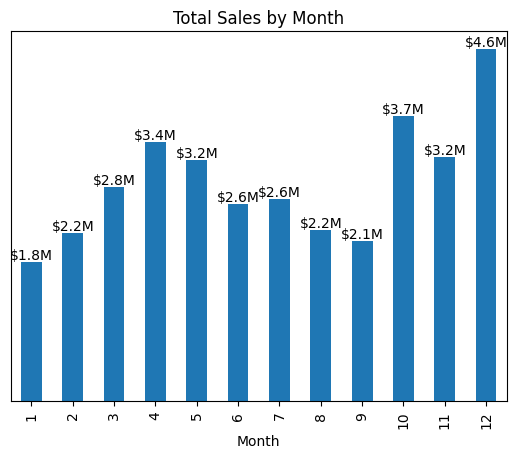

In [180]:
def format_label(value):
    if value >= 1_000_000:
        return f'${value/1_000_000:.1f}M'
    elif value >= 1_000:
        return f'${value/1_000:.1f}K'
    else:
        return f'${value:.0f}'

fig = all_data.groupby('Month')['Sales'].sum().plot(kind = 'bar')
plt.yticks([])
fig.bar_label(ax.containers[0], labels=[format_label(v) for v in all_data.groupby('Month')['Sales'].sum()])
plt.title('Total Sales by Month')
plt.show()

# In which month has maximum order

In [59]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [61]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [65]:
all_data['Purchase Address'][0].split(',')[1]

' Dallas'

In [66]:
all_data['city'] = all_data['Purchase Address'].str.split(',').str.get(1)

In [67]:
all_data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [68]:
pd.value_counts(all_data['city'])

city
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

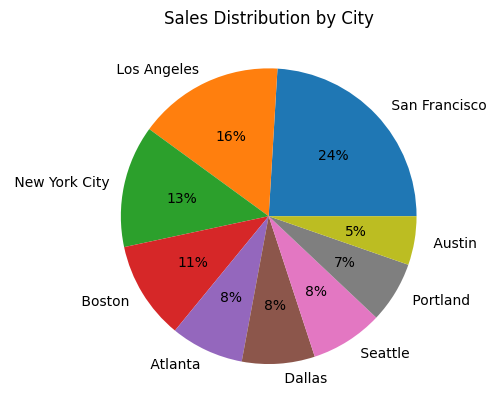

In [184]:
pd.value_counts(all_data['city']).plot(kind = 'pie', autopct = '%1.0f%%')
plt.title('Sales Distribution by City')
plt.ylabel('')  # Remove the 'city' ylabel that appears by default
plt.show()

# Understand What product sold the most & Why?

In [71]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'city'],
      dtype='object')

In [77]:
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each':'mean'})
count_df

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84
AAA Batteries (4-pack),30986,2.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
Flatscreen TV,4813,300.00


In [80]:
count_df = count_df.reset_index()


In [89]:
products = count_df['Product'].values

Text(0.5, 1.0, 'Product Sales Volume vs Average Price')

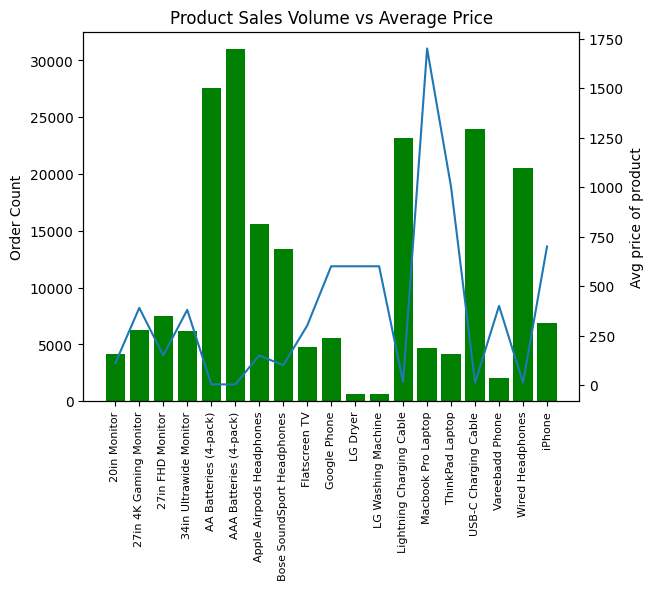

In [185]:
fig, ax1 = plt.subplots()
ax2 =ax1.twinx()
ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color = 'g')
ax2.plot(count_df['Product'], count_df['Price Each'])
ax1.set_xticklabels(products, rotation = 'vertical', fontsize = 8)
ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')
plt.title('Product Sales Volume vs Average Price')



# Understanding the trend of most sold products

In [97]:
all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [99]:
most_sold_product = all_data['Product'].value_counts()[0:5].index
most_sold_product

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [104]:
most_sold_product_df = all_data[all_data['Product'].isin(most_sold_product)]
most_sold_product_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9,2.99,Dallas
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles


In [105]:
most_sold_product_df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


In [107]:
most_sold_product_df.groupby(['Month','Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

Text(0.5, 1.0, 'Monthly Sales Performance: Top 5 Products')

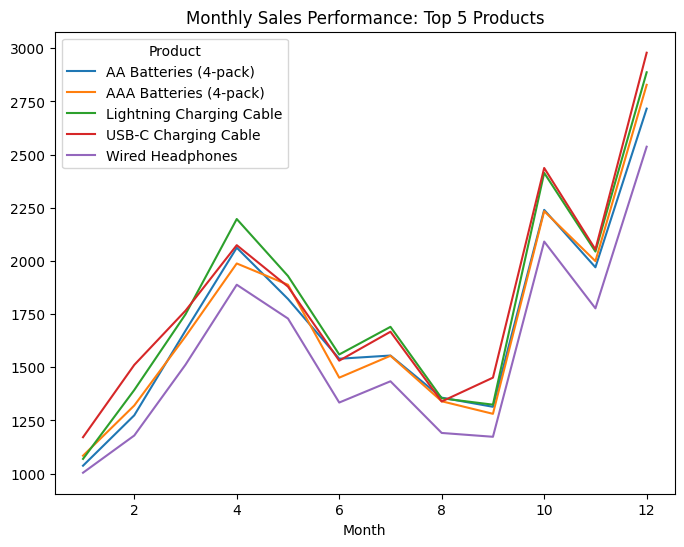

In [186]:
pivot = most_sold_product_df.groupby(['Month','Product']).size().unstack()
pivot.plot(figsize=(8,6))
plt.title('Monthly Sales Performance: Top 5 Products')


# Analysing What products are most often sold together ?


In [113]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'city'],
      dtype='object')

In [114]:
all_data['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [120]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [126]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns = {'Product':'Group_Products'})
dup_products

,Order ID,Group_Products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [131]:
dup_products_df = df_duplicated.merge(dup_products, how='left', on = 'Order ID')
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Group_Products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [132]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID'])

In [133]:
no_dup_df.shape

(6879, 10)

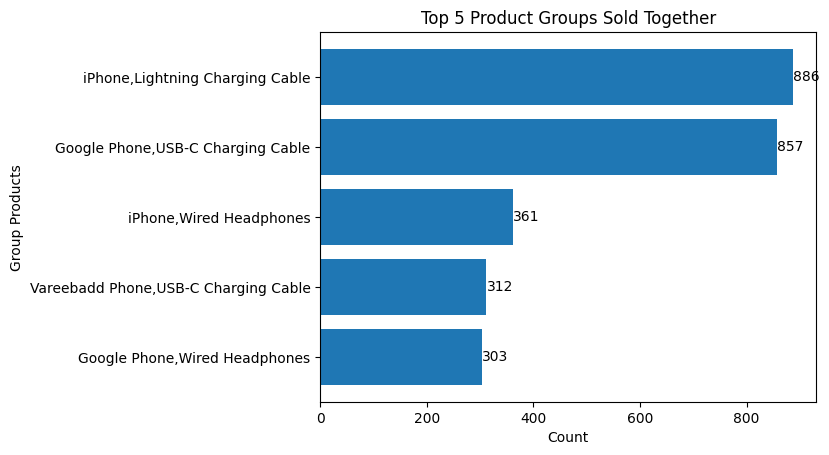

In [144]:

top5 = no_dup_df['Group_Products'].value_counts().head(5).sort_values(ascending=True)
fig, ax = plt.subplots()
bars = ax.barh(top5.index, top5.values)

ax.bar_label(bars, labels=top5.values)

plt.xlabel('Count')
plt.ylabel('Group Products')
plt.title('Top 5 Product Groups Sold Together')

plt.show()


# When do people buy

In [145]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [146]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
city                 object
dtype: object

In [149]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


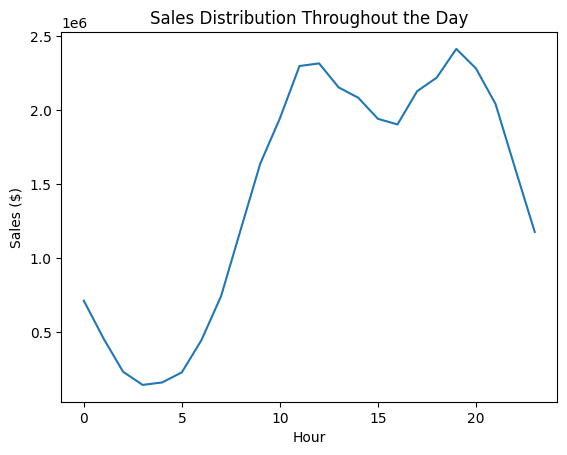

In [187]:
all_data.groupby('Hour')['Sales'].sum().plot()
plt.title('Sales Distribution Throughout the Day')
plt.xlabel('Hour')
plt.ylabel('Sales ($)')
plt.show()

In [155]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'city', 'Hour'],
      dtype='object')

In [162]:
pivot = all_data.pivot_table(index = 'Hour', columns = 'city', values='Sales', aggfunc='sum')
pivot

city,Atlanta,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
Hour,,,,,,,,,
0,62855.02,38095.54,77524.83,45103.93,106176.92,100208.77,46795.29,175921.20,60867.16
1,44443.32,20479.19,48987.45,35310.27,77638.97,71811.12,32359.77,97799.86,31733.95
2,25199.15,15070.52,22018.01,24782.04,34805.51,29175.02,17110.58,50964.17,15714.45
3,7018.49,5957.97,14219.26,14265.28,23673.84,16340.06,11592.08,42127.03,10548.93
4,18954.97,5412.40,21245.82,6769.99,22877.18,20139.72,9621.42,41175.81,16348.76
5,18477.55,12787.88,16447.00,17891.68,37931.63,40200.56,11836.02,53521.90,21570.65
6,39447.56,18528.47,54194.75,36909.89,66811.50,66249.66,34290.75,96635.83,34894.60
7,69861.95,40585.92,68517.54,67286.82,116219.27,101404.71,59898.95,168245.68,52046.48
8,106015.06,60812.95,144361.50,92531.24,172561.11,165058.15,73046.53,283928.39,93994.27


Text(0.5, 1.0, 'Sales by City and Hour')

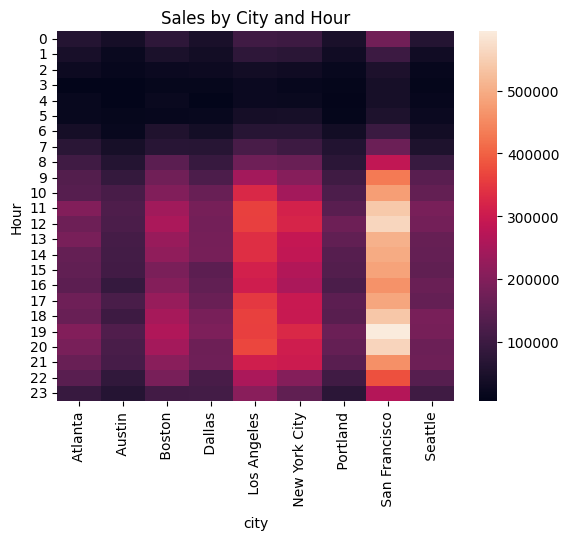

In [183]:
sns.heatmap(pivot)
plt.title('Sales by City and Hour')

In [165]:
import plotly.express as px

In [171]:
fig = px.imshow(pivot, x = pivot.columns, y= pivot.index, title = 'Hourly Heatmap Sales by City',labels = dict(x='City',y='Hour', color = 'Total Sales'))
fig